<a href="https://colab.research.google.com/github/Donthula-Harika/EDA/blob/main/Walmart_Store_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 1 — Data Loading, Merging & Initial Inspection

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Task 1 — Data Loading, Merging & Initial Inspection
# Load all required CSV files into your notebook.
# Merge them into one dataset using Store, Dept, and Date.
# Display the first and last 10 rows.
# Print:


# .shape
# .info()
# .describe()
# Identify:


# Numerical columns
# Categorical columns
# Date columns
# List all unique store types and departments.
# 7. Identify which columns may require cleaning or type conversion


In [ ]:
# 1.Load all required CSV files into your notebook.


import pandas as pd

# --- Load CSV files ---
stores = pd.read_csv("/content/drive/MyDrive/Data Sets/stores.csv")
train = pd.read_csv("/content/drive/MyDrive/Data Sets/train.csv")
features = pd.read_csv("/content/drive/MyDrive/Data Sets/features.csv")




In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
# 2 --- Merge datasets on Store, Dept, and Date ---

# Convert dates
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

# First merge train + features on Store, Date
df = pd.merge(train, features, on=["Store", "Date"], how="left")

# Then merge stores (Store)
df = pd.merge(df, stores, on="Store", how="left")

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [ ]:
#Display the first and last 10 rows.
print("First 10 rows: \n\n",df.head(10))
print("\n\nLast 10 rows: \n\n",df.tail(10))

First 10 rows: 

    Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   
5      1     1 2010-03-12      21043.39        False        57.79       2.667   
6      1     1 2010-03-19      22136.64        False        54.58       2.720   
7      1     1 2010-03-26      26229.21        False        51.45       2.732   
8      1     1 2010-04-02      57258.43        False        62.27       2.719   
9      1     1 2010-04-09      42960.91        False        65.86       2.770   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN      

In [ ]:
# Print:
# .shape
# .info()
# .describe()


In [ ]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (421570, 17)


In [ ]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [ ]:
# Identify:
# Numerical columns
# Categorical columns
# Date columns


In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols


Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols


Index(['Type'], dtype='object')

In [ ]:
date_cols = df.select_dtypes(include=['datetime64']).columns
date_cols


Index(['Date'], dtype='object')

In [ ]:
# List all unique store types and departments.

#  Unique store types
print(df['Type'].unique())


# Unique departments
print(df['Dept'].unique())



['A' 'B' 'C']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [ ]:
# Identify which columns may require cleaning or type conversion
cols_with_missing = df.columns[df.isna().any()]
print("Columns with Missing Values:", cols_with_missing.tolist())



Columns with Missing Values: ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']


In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


##Task 2 — Data Cleaning


In [ ]:
# Identify missing values using .isnull().sum().
# Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.
# Fill missing markdown-related fields with mean values.
# Convert Date column to datetime format.
# Remove duplicate rows.
# Reset the index after cleaning.


In [ ]:
# Identify missing values using .isnull().sum().
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [ ]:
#Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.

columns_to_fill = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [ ]:
#Fill missing markdown-related fields with mean values.
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3",
                 "MarkDown4", "MarkDown5"]

for col in markdown_cols:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()




,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [ ]:
# Convert Date column to datetime format.
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

,0
Store,int64
Dept,int64
Date,datetime64[ns]
Weekly_Sales,float64
IsHoliday_x,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


In [ ]:
# Remove duplicate rows.

df = df.drop_duplicates()
print(df.shape)
df.duplicated().sum()

(421570, 17)


np.int64(0)

In [ ]:
#Reset the index after cleaning.
df = df.reset_index(drop=True)


## Task 3 — Outlier Detection & Treatment

In [ ]:
# Detect outliers in:
# Weekly_Sales
# Temperature
# Fuel_Price
# CPI
# Use:
# Boxplots
# IQR method
# Identify if extreme sales spikes occur during holiday weeks.

# Decide which outliers should be:
# Removed
# Capped
# Kept as business outliers


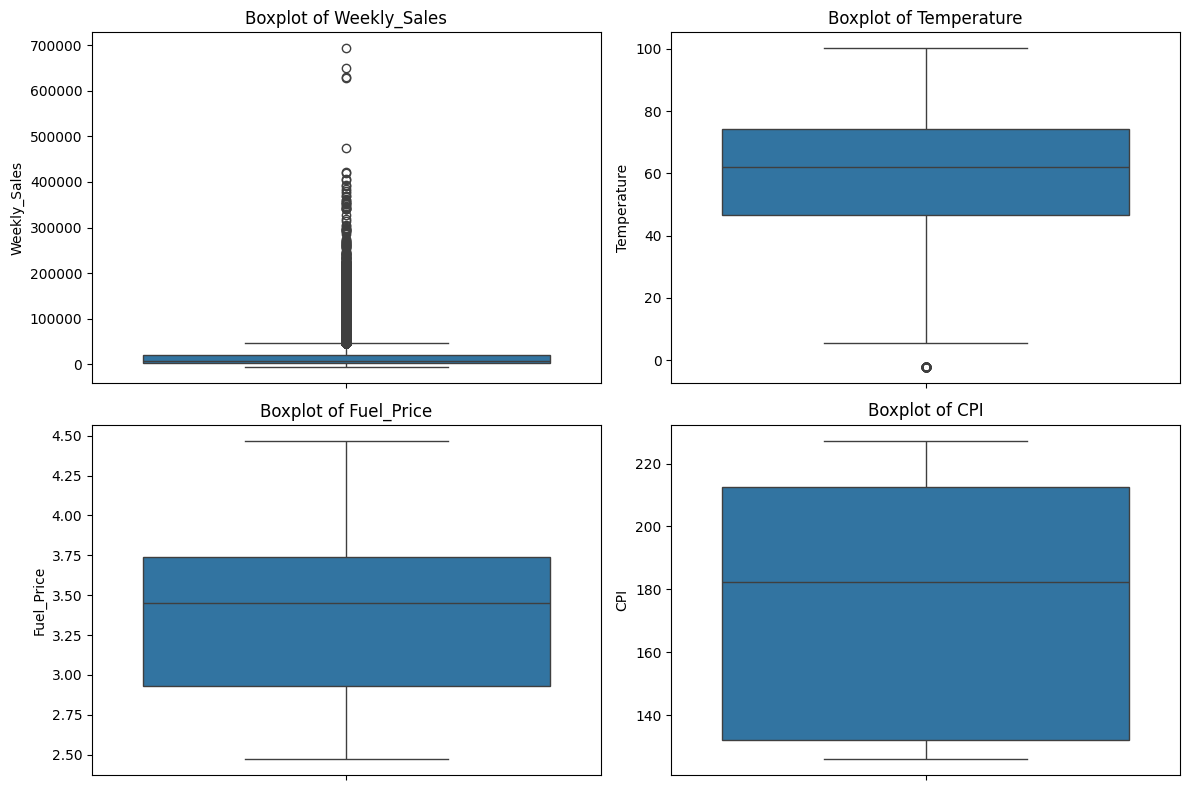

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI"]

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [ ]:
# 2. IQR Method for Outlier Detection
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"--- {col} ---")
    print("Outlier count:", len(outliers))
    print("Lower bound:", lower)
    print("Upper bound:", upper)
    print()
    return lower, upper, outliers

bounds = {}
for col in ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI"]:
    bounds[col] = detect_outliers(col)


--- Weekly_Sales ---
Outlier count: 35521
Lower bound: -25109.653749999998
Upper bound: 47395.15625

--- Temperature ---
Outlier count: 69
Lower bound: 5.279999999999994
Upper bound: 115.68

--- Fuel_Price ---
Outlier count: 0
Lower bound: 1.7254999999999996
Upper bound: 4.9455

--- CPI ---
Outlier count: 0
Lower bound: 11.431177550000001
Upper bound: 333.00848195000003



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [ ]:
# Identify if extreme sales spikes occur during holiday weeks.
holiday_spikes = df[df["IsHoliday_x"] == True].sort_values("Weekly_Sales", ascending=False).head(10)
holiday_spikes


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,126.669267,9.003,True,B,126512
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.240000,3334.628621,58563.240000,20.970000,6386.860000,140.421786,8.745,True,B,103681
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.720000,329.000000,141630.610000,79.000000,1009.980000,129.836400,7.874,True,B,126512
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136.689571,8.763,True,B,103681
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,182.783277,8.724,True,A,200898
195088,20,72,2010-11-26,422306.25,True,46.66,3.039,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,204.962100,7.484,True,A,203742
264390,27,72,2010-11-26,420586.57,True,46.67,3.186,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136.689571,8.021,True,A,204184
214432,22,72,2010-11-26,393705.20,True,44.61,3.070,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136.689571,8.572,True,B,119557
195140,20,72,2011-11-25,392023.02,True,46.38,3.492,335.660000,80.000000,101378.790000,64.460000,2251.980000,211.412076,7.082,True,A,203742
37253,4,72,2011-11-25,385051.04,True,47.96,3.225,561.450000,137.880000,83340.330000,44.040000,9239.230000,129.836400,5.143,True,A,205863


<Axes: title={'center': 'Weekly_Sales'}, xlabel='IsHoliday_x'>

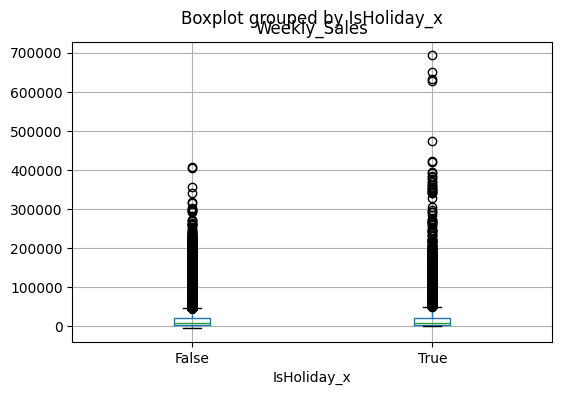

In [ ]:
df.boxplot(column="Weekly_Sales", by="IsHoliday_x", figsize=(6,4))


In [ ]:
# Decide which outliers should be:


# Removed
# Capped
# Kept as business outliers


In [ ]:
# (A) Weekly_Sales — KEEP MOST OUTLIERS

# Because:

# Sales spikes during holidays are legitimate

# Promotions (Markdowns) create natural variability

# Removing them destroys business signal

# 👉 Keep holiday outliers
# 👉 Only fix obvious data errors (negative sales etc.)

# (B) Temperature — CAP EXTREME VALUES

# Real temperatures rarely exceed certain ranges.
# Use IQR boundaries for winsorization.

lower, upper, _ = bounds["Temperature"]
df["Temperature"] = df["Temperature"].clip(lower, upper)

# (C) Fuel_Price — CAP EXTREMES
# Fuel prices move smoothly; spikes may be incorrect.
lower, upper, _ = bounds["Fuel_Price"]
df["Fuel_Price"] = df["Fuel_Price"].clip(lower, upper)


# (D) CPI — CAP OR REMOVE EXTREME OUTLIERS
# Occasional CPI entries are wrong (e.g., missing decimal).
# Capping is best:
lower, upper, _ = bounds["CPI"]
df["CPI"] = df["CPI"].clip(lower, upper)

## Task 4 — Univariate Analysis


In [ ]:
# Perform univariate analysis (one variable at a time):
# Weekly sales distribution (Histogram + KDE).
# Store type distribution (Count plot).
# Distribution of Temperature, Fuel Price, CPI, Unemployment.
# Distribution of sales during:


# Holiday weeks
# Non-holiday weeks
# Identify top 10 departments by average weekly sales.


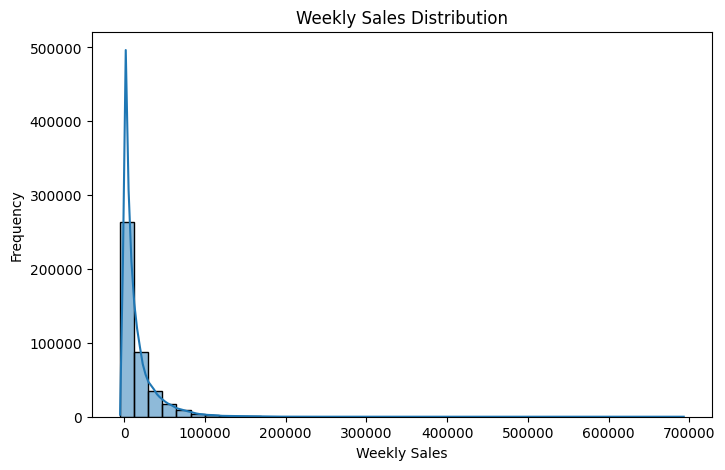

In [ ]:
# Weekly sales distribution (Histogram + KDE).
plt.figure(figsize=(8,5))
sns.histplot(df["Weekly_Sales"], kde=True, bins=40)
plt.title("Weekly Sales Distribution")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


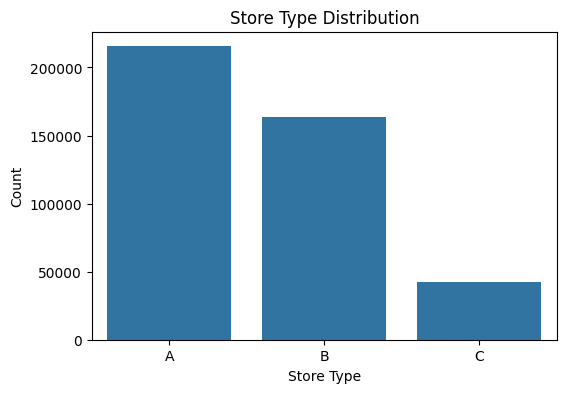

In [ ]:
# Store Type Distribution (Count Plot)
plt.figure(figsize=(6,4))
sns.countplot(x=df["Type"])
plt.title("Store Type Distribution")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.show()

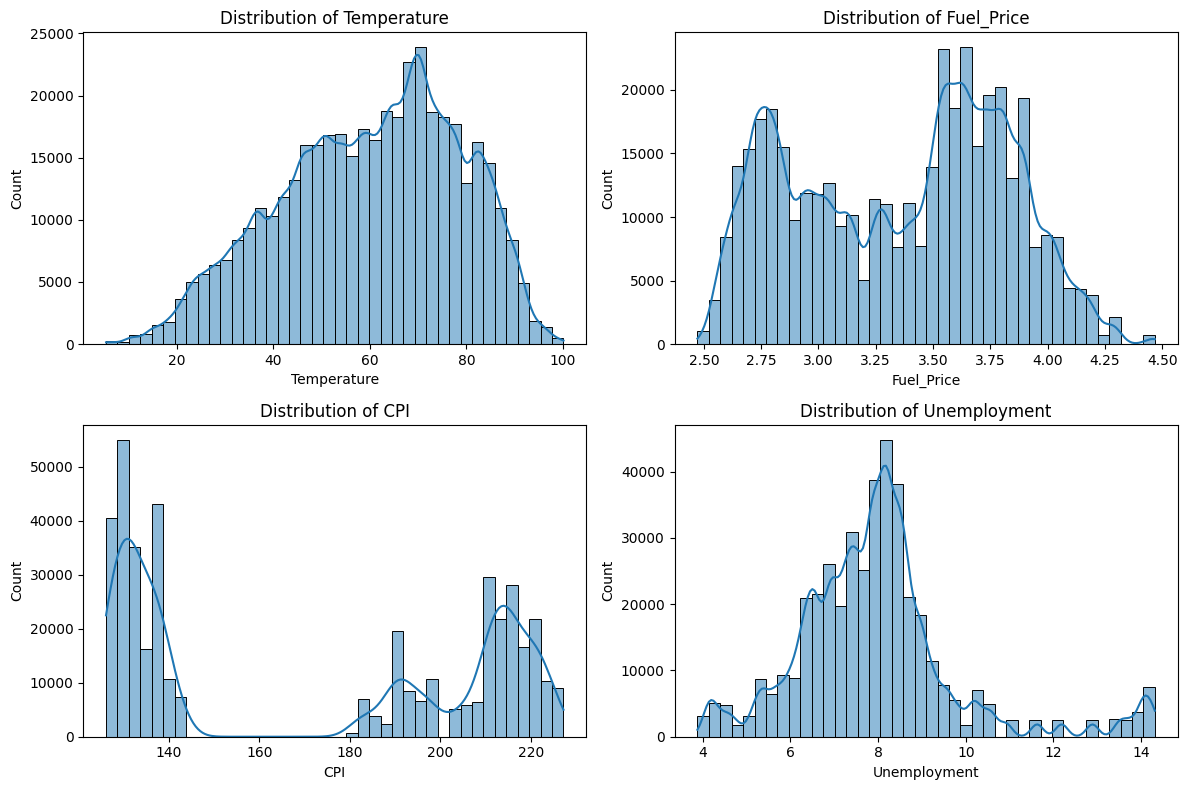

In [ ]:
# Distribution of Temperature, Fuel Price, CPI, Unemployment
cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

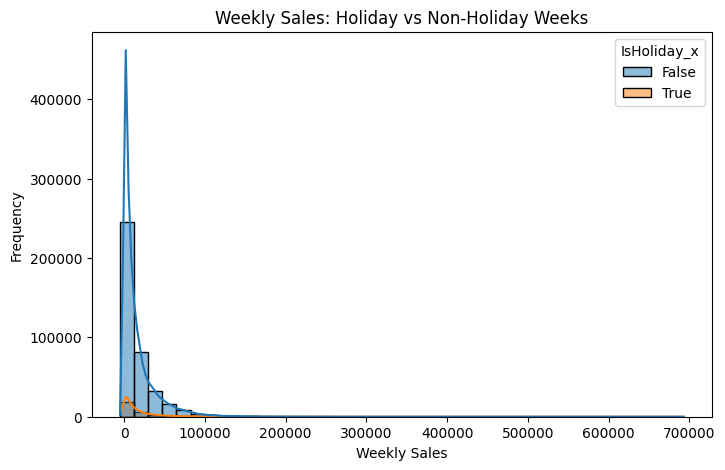

,Weekly_Sales
IsHoliday_x,
False,15901.445069
True,17035.823187


In [ ]:
# Sales Distribution: Holiday vs Non-Holiday Weeks
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Weekly_Sales", hue="IsHoliday_x", kde=True, bins=40)
plt.title("Weekly Sales: Holiday vs Non-Holiday Weeks")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


# To see their average difference:

df.groupby("IsHoliday_x")["Weekly_Sales"].mean()

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64


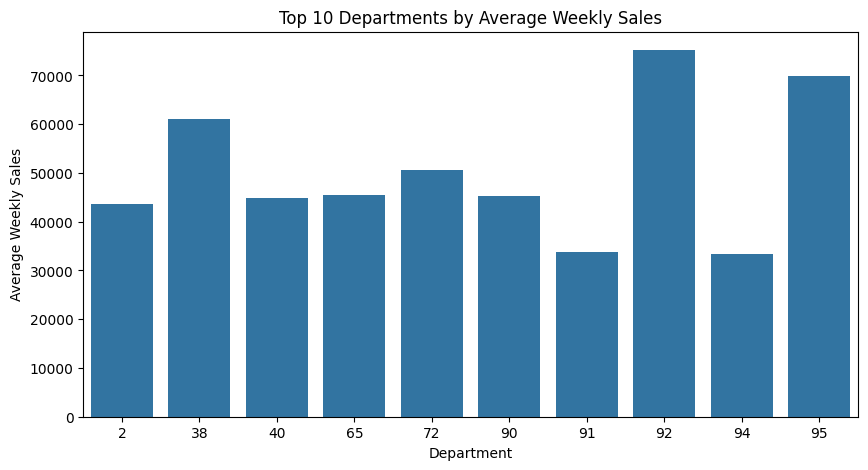

In [ ]:
# top 10 Departments by Average Weekly Sales
top_depts = (
    df.groupby("Dept")["Weekly_Sales"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(top_depts)

plt.figure(figsize=(10,5))
sns.barplot(x=top_depts.index, y=top_depts.values)
plt.title("Top 10 Departments by Average Weekly Sales")
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")
plt.show()

##Task 5 — Bivariate Analysis

In [ ]:
# Study the relationship between two variables:
# Relationship between Temperature & Weekly Sales (scatter plot).
# Relationship between Fuel Price & Weekly Sales.
# Weekly Sales vs. Store Type.
# Weekly Sales vs. Holiday_Flag.
# Compare sales between:


# Top-performing store
# Lowest-performing store


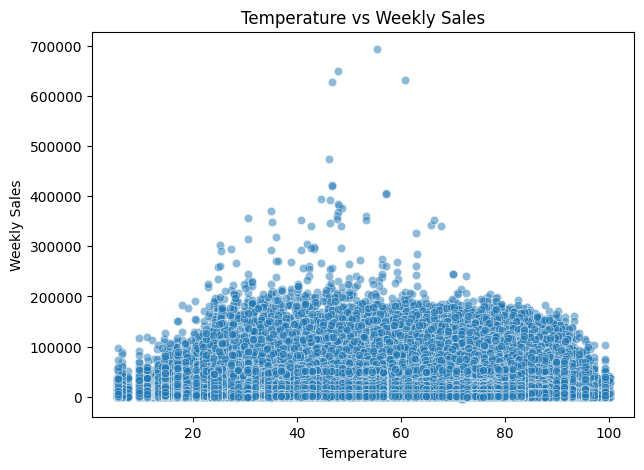

In [ ]:
# Temperature vs Weekly Sales (Scatter Plot)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Temperature", y="Weekly_Sales", alpha=0.5)
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

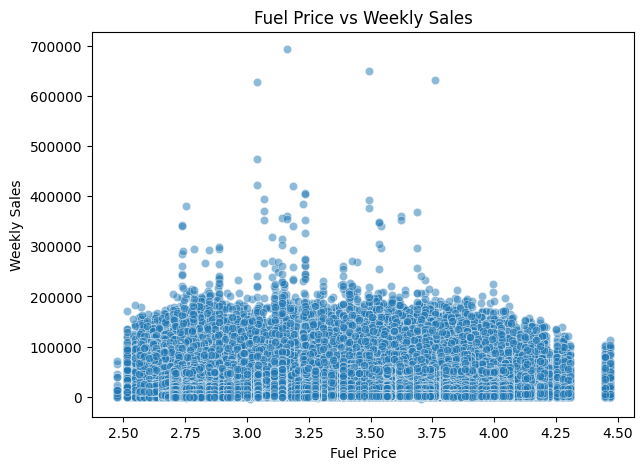

In [ ]:
# Fuel Price vs Weekly Sales (Scatter Plot)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Fuel_Price", y="Weekly_Sales", alpha=0.5)
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()

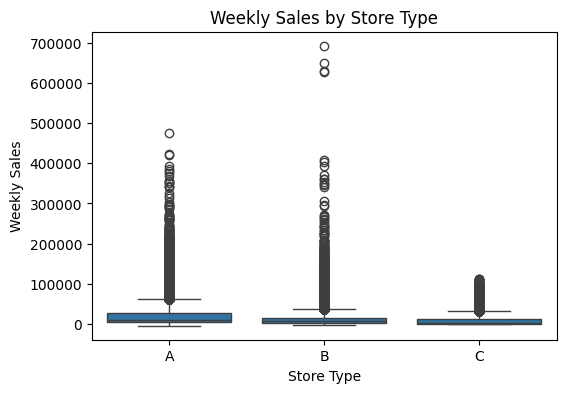

In [ ]:
# Weekly Sales vs Store Type (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x="Type", y="Weekly_Sales", data=df)
plt.title("Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.show()

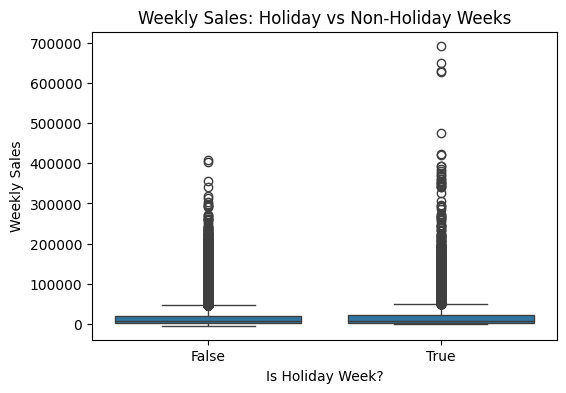

In [ ]:
# Weekly Sales vs Holiday Flag (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x="IsHoliday_x", y="Weekly_Sales", data=df)
plt.title("Weekly Sales: Holiday vs Non-Holiday Weeks")
plt.xlabel("Is Holiday Week?")
plt.ylabel("Weekly Sales")
plt.show()

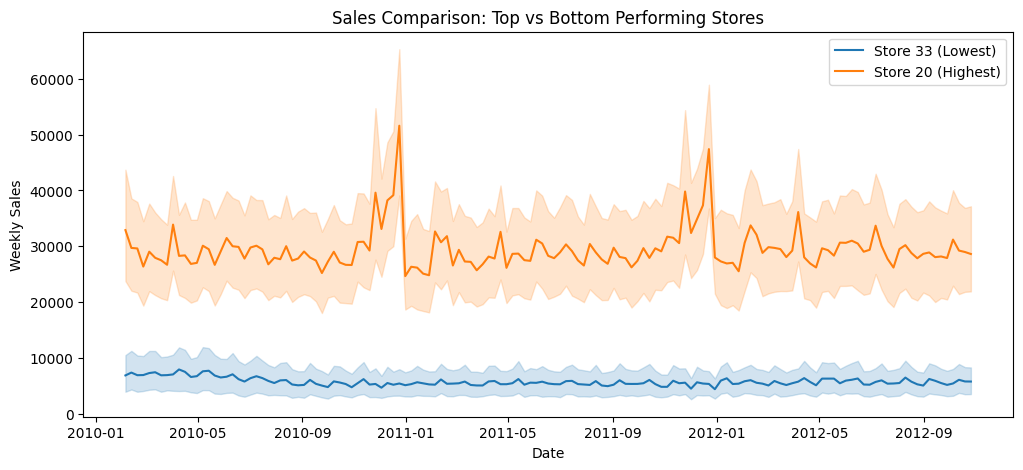

In [ ]:
# Compare Sales Between Top vs Bottom Performing Stores
# Step 1 — Compute total annual sales per store
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values()

# Step 2 — Identify top and bottom store
lowest_store = store_sales.index[0]
highest_store = store_sales.index[-1]

lowest_store, highest_store

# Step 3 — Plot their weekly sales trend
plt.figure(figsize=(12,5))

# Lowest performing store
sns.lineplot(data=df[df["Store"] == lowest_store], x="Date", y="Weekly_Sales", label=f"Store {lowest_store} (Lowest)")

# Highest performing store
sns.lineplot(data=df[df["Store"] == highest_store], x="Date", y="Weekly_Sales", label=f"Store {highest_store} (Highest)")

plt.title("Sales Comparison: Top vs Bottom Performing Stores")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

## Task 6 — Multivariate Analysis


In [ ]:
# Analyze more than two variables together:
# Create a correlation heatmap for all numeric features.
# Analyze store-level sales using:


# Store Type
# Store Size
# Weekly Sales
# Multivariate relationship:


# Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)
# Analyze whether discount markdowns influence sales when considering:


# Date
# Holiday weeks
# Markdown values


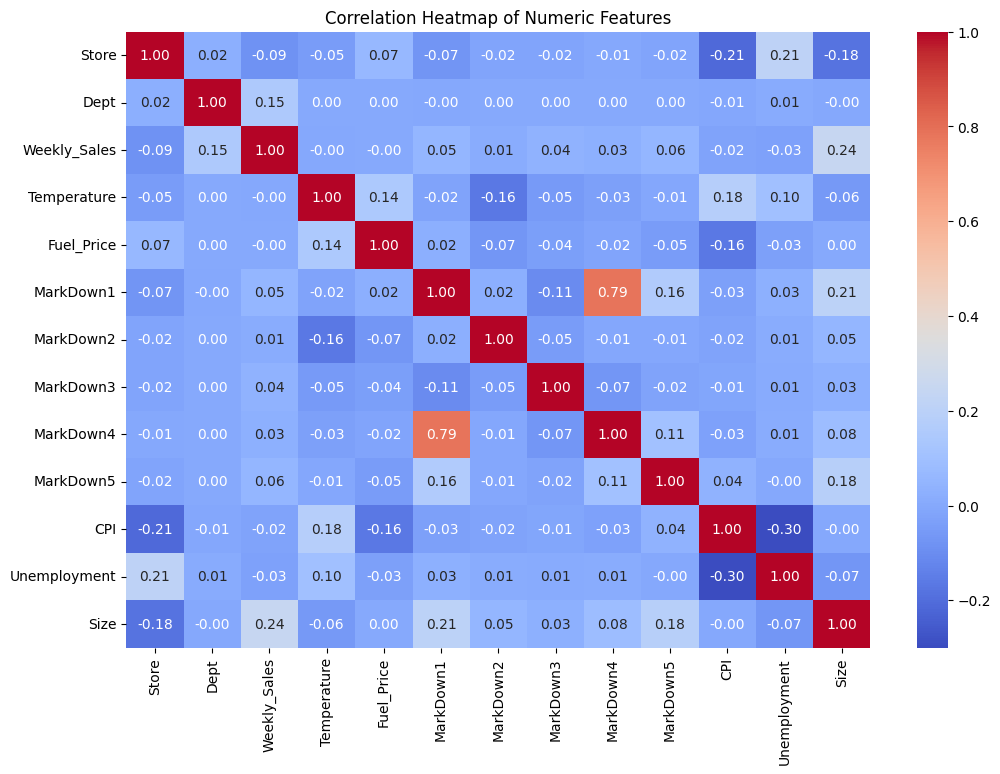

In [ ]:
# Correlation Heatmap (Numeric Features)
plt.figure(figsize=(12,8))
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

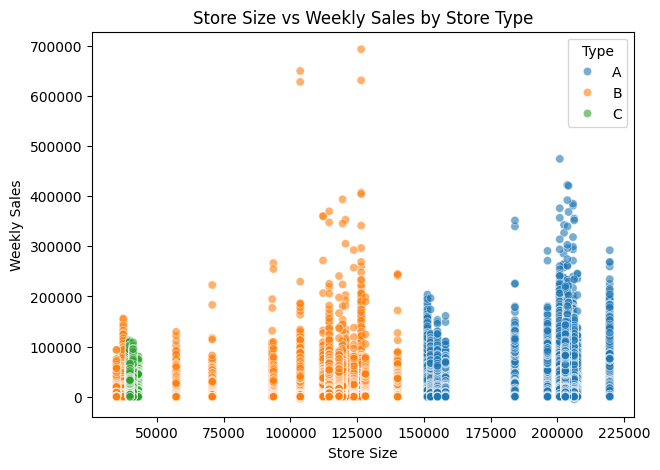

In [ ]:
# Store-Level Sales Using Type, Size, Weekly Sales
# Average Sales by Store Type
df.groupby("Type")["Weekly_Sales"].mean().sort_values()
# Scatter Plot: Store Size vs Weekly Sales (Colored by Type)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Size", y="Weekly_Sales", hue="Type", alpha=0.6)
plt.title("Store Size vs Weekly Sales by Store Type")
plt.xlabel("Store Size")
plt.ylabel("Weekly Sales")
plt.show()

#Interpretation to Expect

# Larger stores (Type A) generally outperform B and C

# Size alone doesn’t explain everything — holidays and markdowns push spikes

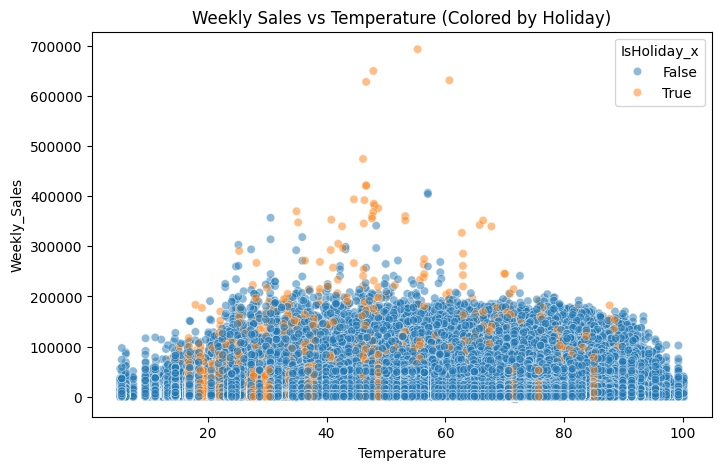

In [ ]:
# Weekly Sales vs Temperature vs Holiday_Flag (3-variable analysis)
# Option A — Scatter Plot, Color by Holiday
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Temperature",
    y="Weekly_Sales",
    hue="IsHoliday_x",
    alpha=0.5
)
plt.title("Weekly Sales vs Temperature (Colored by Holiday)")
plt.show()

# Interpretation:

# Holiday dots form the “upper galaxy” — high sales regardless of temperature

# Temperature barely affects sales except extreme weather weeks

In [ ]:
df.groupby(["IsHoliday_x"]).agg({
    "Weekly_Sales": ["mean", "max"],
    "Temperature": "mean"
})

Weekly_Sales            Temperature
                     mean        max        mean
IsHoliday_x                                     
False        15901.445069  406988.63   60.882811
True         17035.823187  693099.36   49.632550

In [ ]:
# Do Markdown Discounts Influence Sales? (Multi-dimensional)

# Markdowns influence sales differently on holiday weeks, pre-holiday weeks, and normal weeks. Let's examine this as a story told through numbers.

# A. Correlation of Markdowns with Sales
markdown_cols = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]

df[markdown_cols + ["Weekly_Sales"]].corr()["Weekly_Sales"].sort_values()

# Expectation

# MarkDown2 & MarkDown5 often show stronger connections

# MarkDown3 sometimes correlates negatively (stores push clearance items)

,Weekly_Sales
MarkDown2,0.013121
MarkDown4,0.026984
MarkDown3,0.036018
MarkDown1,0.052208
MarkDown5,0.055405
Weekly_Sales,1.000000


In [ ]:
# Markdown Impact by Holiday vs Non-Holiday Weeks
df.groupby("IsHoliday_x")[markdown_cols + ["Weekly_Sales"]].mean()

# Insights you’ll notice:

# Markdowns jump massively in holiday periods

# Weekly_Sales also leap → strong co-movement

# Non-holiday weeks show lower markdown activity

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales
IsHoliday_x,,,,,,
False,7277.064823,3068.865511,1040.761525,3383.500934,4662.396371,15901.445069
True,6841.514593,6846.140528,6706.890011,3378.772597,4187.381566,17035.823187


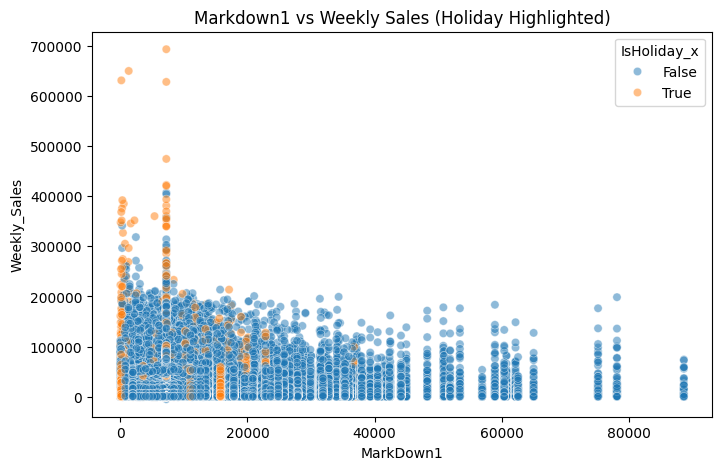

In [ ]:
# Scatter Plot: Markdown vs Sales (Holiday Highlighted)
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="MarkDown1",
    y="Weekly_Sales",
    hue="IsHoliday_x",
    alpha=0.5
)
plt.title("Markdown1 vs Weekly Sales (Holiday Highlighted)")
plt.show()

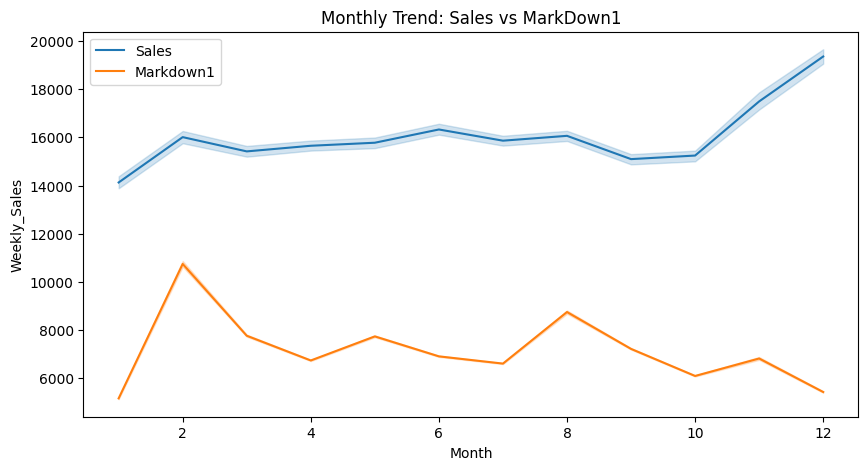

In [ ]:
# Monthly Trend: Do Markdowns Drive Seasonal Sales?
df["Month"] = df["Date"].dt.month

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Month", y="Weekly_Sales", label="Sales")
sns.lineplot(data=df, x="Month", y="MarkDown1", label="Markdown1")
plt.title("Monthly Trend: Sales vs MarkDown1")
plt.show()

##Task 7 — Time Series Analysis

In [ ]:
##Task 7 — Time Series Analysis

In [ ]:
# Task 7 — Time Series Analysis
# Convert Date to:


# Year
# Month
# Week
# Plot total weekly sales over time.
# Plot monthly sales trends for:


# Store with highest sales
# Store with lowest sales
# Identify seasonal patterns:


# Which months show peak sales?
# Which departments show seasonal demand?


In [ ]:
# Create Year, Month, Week Columns
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

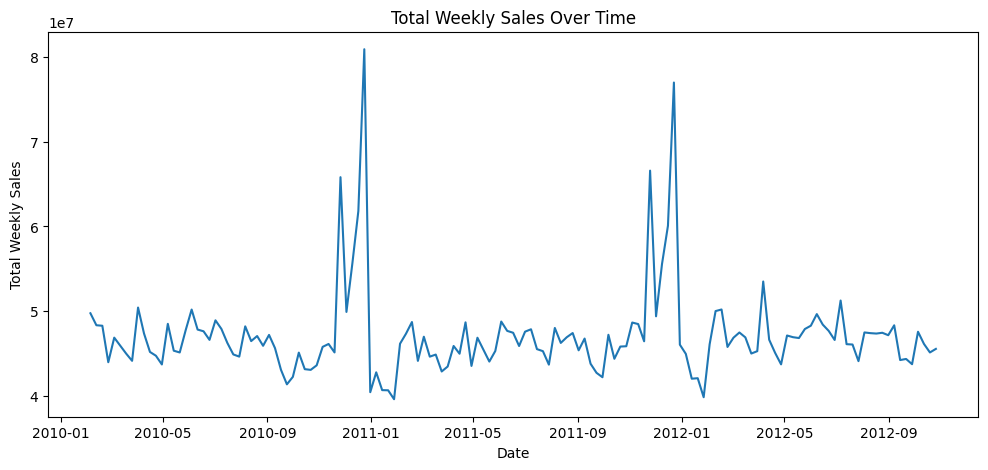

In [ ]:
# Total Weekly Sales Over Time (Line Plot)
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=weekly_sales, x="Date", y="Weekly_Sales")
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Total Weekly Sales")
plt.xlabel("Date")
plt.show()

# Strong end-of-year spikes (holiday season)

# Mid-year stable plateau

# Occasional sharp peaks tied to markdown events

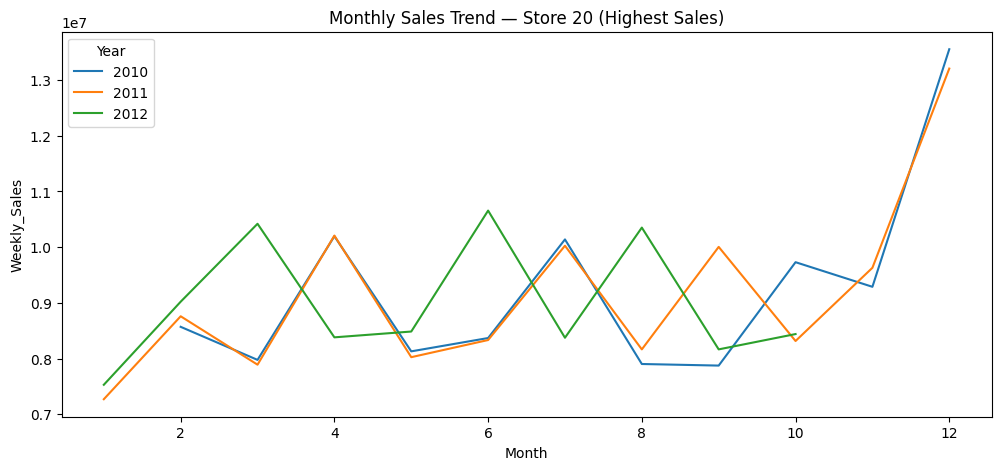

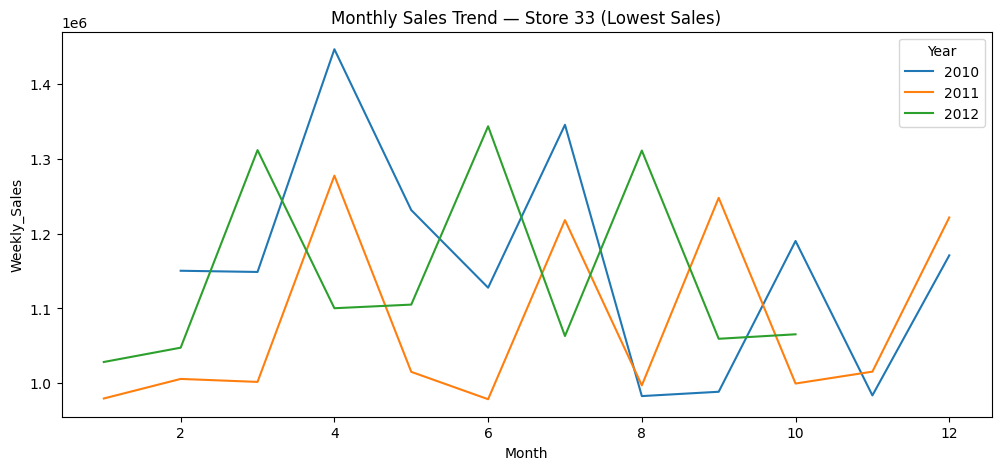

In [ ]:
# Monthly Sales Trend — Highest vs Lowest Performing Stores
# Step 1 — Identify the stores
store_totals = df.groupby("Store")["Weekly_Sales"].sum().sort_values()

lowest_store = store_totals.index[0]
highest_store = store_totals.index[-1]
lowest_store, highest_store

# Step 2 — Compute monthly sales for each
monthly_sales = df.groupby(["Store", "Year", "Month"])["Weekly_Sales"].sum().reset_index()

# Step 3 — Plot for highest + lowest stores
plt.figure(figsize=(12,5))

# Highest
sns.lineplot(
    data=monthly_sales[monthly_sales["Store"] == highest_store],
    x="Month", y="Weekly_Sales", hue="Year",
    palette="tab10"
)
plt.title(f"Monthly Sales Trend — Store {highest_store} (Highest Sales)")
plt.show()

# Lowest
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_sales[monthly_sales["Store"] == lowest_store],
    x="Month", y="Weekly_Sales", hue="Year",
    palette="tab10"
)
plt.title(f"Monthly Sales Trend — Store {lowest_store} (Lowest Sales)")
plt.show()

# Interpretation:

# Highest store: clear holiday surges + steady growth

# Lowest store: flatter curves, small seasonal impact

In [ ]:
# Identify Monthly Seasonal Patterns (Overall)
monthly_totals = df.groupby("Month")["Weekly_Sales"].mean().sort_values(ascending=False)
monthly_totals

,Weekly_Sales
Month,
12,19355.702141
11,17491.031424
6,16326.137002
8,16062.516933
2,16008.779217
7,15861.419650
5,15776.337202
4,15650.338357
3,15416.657597


In [ ]:
# Expected Pattern:

# November & December → biggest sales (holiday shopping + markdowns)

# February & March → generally softer months

# Summer (June–July) → moderate rise

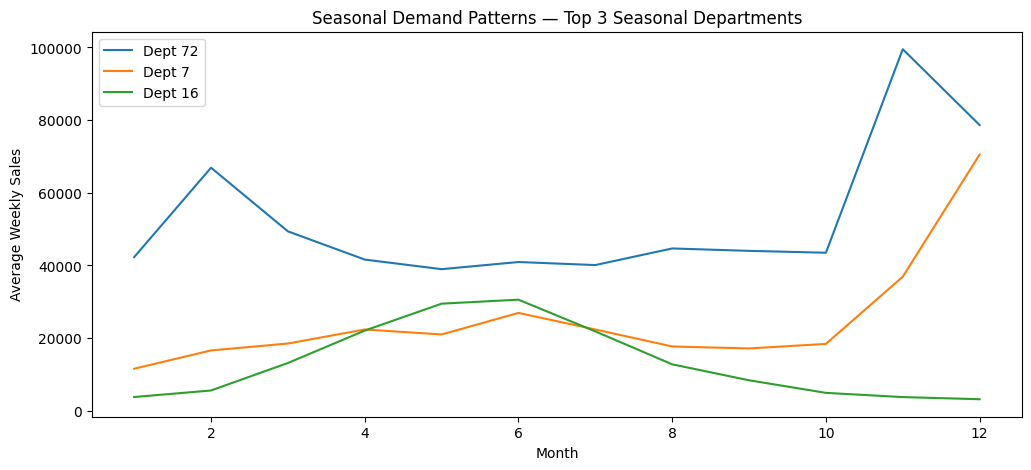

In [ ]:
# Seasonal Demand by Department
# Step 1 — Create grouped dataset
dept_monthly = df.groupby(["Dept", "Month"])["Weekly_Sales"].mean().reset_index()

# Step 2 — Identify the most seasonal departments

# (Measure variance across months)

dept_variability = dept_monthly.groupby("Dept")["Weekly_Sales"].std().sort_values(ascending=False)
dept_variability.head(10)

# Step 3 — Plot seasonal patterns for top 3 seasonal departments
top_seasonal = dept_variability.head(3).index

plt.figure(figsize=(12,5))
for d in top_seasonal:
    temp = dept_monthly[dept_monthly["Dept"] == d]
    sns.lineplot(data=temp, x="Month", y="Weekly_Sales", label=f"Dept {d}")

plt.title("Seasonal Demand Patterns — Top 3 Seasonal Departments")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.legend()
plt.show()

In [ ]:
# Business Insight:

# Holiday-driven departments (e.g., electronics, toys) peak heavily in Nov–Dec

# Grocery departments show consistent, low-seasonality sales

# Some departments show strong summer spikes (outdoor, garden items)

##Task 8 — Feature Engineering


###Task 8A — Create New Columns

In [ ]:
# year, month, week → from date.
# discount_effect = MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5
# is_peak_season → True if month in {11, 12}.
# normalized_sales = Weekly_Sales / Size


In [ ]:
# Extract year, month, week from Date
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week


In [ ]:
# Create discount_effect (total markdown impact)
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df["discount_effect"] = df[markdown_cols].sum(axis=1)


In [ ]:
# Create is_peak_season (Nov–Dec)
df["is_peak_season"] = df["Month"].isin([11, 12])



In [ ]:
# Create normalized_sales
df["normalized_sales"] = df["Weekly_Sales"] / df["Size"]


###Task 8B — Filtering Using Created Columns

In [ ]:
# Peak-season transactions where weekly_sales > 50,000
peak_high_sales = df[(df["is_peak_season"] == True) & (df["Weekly_Sales"] > 50000)]
peak_high_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,IsHoliday_y,Type,Size,Month,Year,Week,discount_effect,is_peak_season,normalized_sales
46,1,1,2010-12-24,55931.23,False,52.33,2.886,7246.420196,3334.628621,1439.421384,...,7.838,False,A,151315,12,2010,51,20032.613536,True,0.369634
189,1,2,2010-12-24,59889.32,False,52.33,2.886,7246.420196,3334.628621,1439.421384,...,7.838,False,A,151315,12,2010,51,20032.613536,True,0.395792
240,1,2,2011-12-16,51137.42,False,51.63,3.159,5011.320000,67.000000,347.370000,...,7.866,False,A,151315,12,2011,50,9662.850000,True,0.337953
241,1,2,2011-12-23,65615.36,False,47.96,3.112,2725.360000,40.480000,634.700000,...,7.866,False,A,151315,12,2011,51,6164.870000,True,0.433634
614,1,5,2010-11-26,70158.86,True,64.52,2.735,7246.420196,3334.628621,1439.421384,...,7.838,True,A,151315,11,2010,47,20032.613536,True,0.463661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421193,45,95,2010-12-24,55185.25,False,30.59,3.141,7246.420196,3334.628621,1439.421384,...,8.724,False,B,118221,12,2010,51,20032.613536,True,0.466797
421238,45,95,2011-11-04,53342.74,False,43.92,3.551,7246.420196,3334.628621,1439.421384,...,8.523,False,B,118221,11,2011,44,20032.613536,True,0.451212
421243,45,95,2011-12-09,50575.14,False,46.57,3.415,6176.690000,2.870000,379.570000,...,8.523,False,B,118221,12,2011,49,18323.070000,True,0.427802
421244,45,95,2011-12-16,50108.41,False,39.93,3.413,4631.260000,8.920000,801.340000,...,8.523,False,B,118221,12,2011,50,9047.670000,True,0.423854


In [ ]:
# Stores whose normalized_sales is in the top 10% percentile
threshold = df["normalized_sales"].quantile(0.90)

top_normalized = df[df["normalized_sales"] >= threshold]
top_normalized

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,IsHoliday_y,Type,Size,Month,Year,Week,discount_effect,is_peak_season,normalized_sales
8,1,1,2010-04-02,57258.43,False,62.27,2.719,7246.420196,3334.628621,1439.421384,...,7.808,False,A,151315,4,2010,13,20032.613536,False,0.378406
46,1,1,2010-12-24,55931.23,False,52.33,2.886,7246.420196,3334.628621,1439.421384,...,7.838,False,A,151315,12,2010,51,20032.613536,True,0.369634
63,1,1,2011-04-22,50510.31,False,72.99,3.807,7246.420196,3334.628621,1439.421384,...,7.682,False,A,151315,4,2011,16,20032.613536,False,0.333809
106,1,1,2012-02-17,54060.10,False,45.32,3.510,9873.330000,11062.270000,9.800000,...,7.348,False,A,151315,2,2012,7,32757.370000,False,0.357269
113,1,1,2012-04-06,57592.12,False,70.43,3.891,10121.970000,3334.628621,77.980000,...,7.143,False,A,151315,4,2012,14,21795.888621,False,0.380611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421285,45,95,2012-09-28,49380.11,False,64.88,3.997,4556.610000,20.640000,1.500000,...,8.684,False,B,118221,9,2012,39,9468.010000,False,0.417693
421286,45,95,2012-10-05,50241.01,False,64.89,3.985,5046.740000,3334.628621,18.820000,...,8.667,False,B,118221,10,2012,40,12993.628621,False,0.424975
421287,45,95,2012-10-12,49334.77,False,54.47,4.000,1956.280000,3334.628621,7.890000,...,8.667,False,B,118221,10,2012,41,9888.658621,False,0.417310
421288,45,95,2012-10-19,48434.97,False,56.47,3.969,2004.020000,3334.628621,3.180000,...,8.667,False,B,118221,10,2012,42,7317.048621,False,0.409699


In [ ]:
# Departments where discount_effect > median discount
median_discount = df["discount_effect"].median()

high_discount_depts = df[df["discount_effect"] > median_discount]
high_discount_depts

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,IsHoliday_y,Type,Size,Month,Year,Week,discount_effect,is_peak_season,normalized_sales
92,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.90,6115.670000,215.07,...,7.866,False,A,151315,11,2011,45,25671.680000,True,0.123514
94,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.000000,55805.51,...,7.866,True,A,151315,11,2011,47,56876.740000,True,0.138197
95,1,1,2011-12-02,25293.49,False,48.91,3.172,5629.51,68.000000,1398.11,...,7.866,False,A,151315,12,2011,48,29655.580000,True,0.167158
96,1,1,2011-12-09,33305.92,False,43.93,3.158,4640.65,19.000000,105.02,...,7.866,False,A,151315,12,2011,49,22865.910000,True,0.220110
99,1,1,2011-12-30,23350.88,True,44.55,3.129,5762.10,46011.380000,260.36,...,7.866,True,A,151315,12,2011,52,57753.270000,True,0.154320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421544,45,98,2012-05-04,694.25,False,55.21,3.951,11984.62,3334.628621,47.52,...,8.567,False,B,118221,5,2012,18,23292.938621,False,0.005872
421557,45,98,2012-08-03,516.46,False,76.58,3.654,24853.05,39.560000,17.96,...,8.684,False,B,118221,8,2012,31,38821.580000,False,0.004369
421558,45,98,2012-08-10,727.49,False,78.65,3.722,17868.84,50.600000,57.66,...,8.684,False,B,118221,8,2012,32,22461.620000,False,0.006154
421561,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.000000,92.93,...,8.684,False,B,118221,8,2012,35,34720.670000,False,0.002927


In [ ]:
# Multi-condition filter

# Temperature < 40
# Fuel price > 3.5
# Weekly sales between 20,000 and 60,000
# is_peak_season = True

filtered_rows = df[
    (df["Temperature"] < 40) &
    (df["Fuel_Price"] > 3.5) &
    (df["Weekly_Sales"].between(20000, 60000)) &
    (df["is_peak_season"] == True)
]

filtered_rows

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,IsHoliday_y,Type,Size,Month,Year,Week,discount_effect,is_peak_season,normalized_sales
59234,7,2,2011-11-04,21320.52,False,23.41,3.527,7246.420196,3334.628621,1439.421384,...,8.513,False,B,70713,11,2011,44,20032.613536,True,0.301508
60235,7,9,2011-11-04,28969.99,False,23.41,3.527,7246.420196,3334.628621,1439.421384,...,8.513,False,B,70713,11,2011,44,20032.613536,True,0.409684
60378,7,10,2011-11-04,28281.31,False,23.41,3.527,7246.420196,3334.628621,1439.421384,...,8.513,False,B,70713,11,2011,44,20032.613536,True,0.399945
60379,7,10,2011-11-11,23758.50,False,19.53,3.505,3307.600000,1431.650000,143.060000,...,8.513,False,B,70713,11,2011,45,7893.520000,True,0.335985
60522,7,11,2011-11-11,20611.14,False,19.53,3.505,3307.600000,1431.650000,143.060000,...,8.513,False,B,70713,11,2011,45,7893.520000,True,0.291476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408186,44,38,2011-11-11,54238.48,False,33.80,3.513,48.840000,224.310000,4.290000,...,6.078,False,C,39910,11,2011,45,4439.078256,True,1.359020
410736,44,90,2011-11-11,34552.00,False,33.80,3.513,48.840000,224.310000,4.290000,...,6.078,False,C,39910,11,2011,45,4439.078256,True,0.865748
411022,44,92,2011-11-11,46554.78,False,33.80,3.513,48.840000,224.310000,4.290000,...,6.078,False,C,39910,11,2011,45,4439.078256,True,1.166494
411308,44,94,2011-11-11,20018.92,False,33.80,3.513,48.840000,224.310000,4.290000,...,6.078,False,C,39910,11,2011,45,4439.078256,True,0.501602


### Task 8C — Grouping & Business Insights

In [ ]:
# Monthly average sales per store.
# Total discount_effect per department.
# Department with highest normalized_sales.
# Compute store-wise revenue potential:
# revenue_potential = Weekly_Sales * 52
# Identify top 10 stores based on revenue potential.


In [ ]:
# Monthly Average Sales Per Store
monthly_avg_sales = (
    df.groupby(["Store", "Month"])["Weekly_Sales"]
      .mean()
      .reset_index()
      .sort_values(["Store", "Month"])
)

monthly_avg_sales

,Store,Month,Weekly_Sales
0,1,1,19586.960647
1,1,2,22497.470104
2,1,3,21750.978506
3,1,4,21601.538801
4,1,5,21669.008080
...,...,...,...
535,45,8,10936.463520
536,45,9,10679.800715
537,45,10,10958.758503
538,45,11,12980.557763


In [ ]:
# Insight you’ll see:

# Seasonal rises (months 11–12)

# Underperforming stores with flatter curves

# Stores that respond strongly to promotions

In [ ]:
# Total discount_effect Per Department
dept_discount = (
    df.groupby("Dept")["discount_effect"]
      .sum()
      .sort_values(ascending=False)
)

dept_discount

,discount_effect
Dept,
1,1.270458e+08
2,1.270458e+08
3,1.270458e+08
4,1.270458e+08
7,1.270458e+08
...,...
77,5.514791e+06
78,5.362214e+06
65,2.579784e+06


In [ ]:
# What this reveals:

# Departments that depend heavily on markdowns

# Discount-heavy departments often correlate with holiday spikes

In [ ]:
# Department with Highest Normalized Sales
dept_normalized = (
    df.groupby("Dept")["normalized_sales"]
      .mean()
      .sort_values(ascending=False)
)

top_normalized_dept = dept_normalized.index[0]
top_normalized_dept, dept_normalized.iloc[0]

(np.int64(92), np.float64(0.6415466716405624))

In [ ]:
# The top department generates the highest sales relative to store size —
# a true efficiency champion.

In [ ]:
# Compute Store-wise Revenue Potential
# Assumption: Weekly_Sales * 52 weeks

df["revenue_potential"] = df["Weekly_Sales"] * 52


# Store-level aggregation:

store_revenue = (
    df.groupby("Store")["revenue_potential"]
      .mean()     # avg yearly revenue potential
      .sort_values(ascending=False)
)

store_revenue

,revenue_potential
Store,
20,1.534432e+06
4,1.516383e+06
14,1.496812e+06
13,1.422467e+06
2,1.398700e+06
10,1.369280e+06
27,1.291003e+06
6,1.139489e+06
1,1.128948e+06


In [ ]:
# Identify Top 10 Stores Based on Revenue Potential
top_10_stores = store_revenue.head(10)
top_10_stores

,revenue_potential
Store,
20,1.534432e+06
4,1.516383e+06
14,1.496812e+06
13,1.422467e+06
2,1.398700e+06
10,1.369280e+06
27,1.291003e+06
6,1.139489e+06
1,1.128948e+06
